In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/drive/My Drive/cleaned_total_reviews.csv')
df.head()

,review_id,Bank,review,ratings,thumbs_Up_Count,review_App_Version,review_time,manual_labels,ratings_label,tokens
0,101,Barclays,not smoothest easiest apps navigate . but choi...,2,28,2.89.0,2024-02-27 12:49:00,Neutral,negative,"['not', 'smoothest', 'easiest', 'apps', 'navig..."
1,102,Barclays,app has good features eg let 's track spend ca...,3,102,2.88.2,2024-02-10 09:35:00,Neutral,neutral,"['app', 'has', 'good', 'features', 'eg', 'let'..."
2,103,Barclays,easy app use . easy navigate fast making trans...,5,84,2.89.0,2024-02-20 11:33:00,Positive,positive,"['easy', 'app', 'use', '.', 'easy', 'navigate'..."
3,104,Barclays,pointless app . i can see much i owe and pay o...,1,0,2.89.0,2024-02-28 14:06:00,Negative,negative,"['pointless', 'app', '.', 'i', 'can', 'see', '..."
4,105,Barclays,update . issue was resolved quickly and i 'm r...,5,2,2.89.0,2024-02-27 16:41:00,Positive,positive,"['update', '.', 'issue', 'was', 'resolved', 'q..."


In [11]:
# Check the unique values in both 'manual_labels' and 'ratings_label' columns
manual_labels = df['manual_labels'].unique()
ratings_label = df['ratings_label'].unique()

In [12]:
manual_labels, ratings_label

(array(['Neutral', 'Positive', 'Negative'], dtype=object),
 array(['negative', 'neutral', 'positive'], dtype=object))

In [13]:
# Standardize the case of the labels and calculate the accuracy
df['manual_labels'] = df['manual_labels'].str.lower()
df['ratings_label'] = df['ratings_label'].str.lower()

In [14]:
# calculate accuracy
accuracy = accuracy_score(df['manual_labels'], df['ratings_label'])
accuracy

0.7748743718592965

In [15]:
import matplotlib.pyplot as plt

In [17]:
# Calculate accuracy by bank
accuracy_by_bank = df.groupby('Bank').apply(
    lambda x: accuracy_score(x['manual_labels'], x['ratings_label'])
)

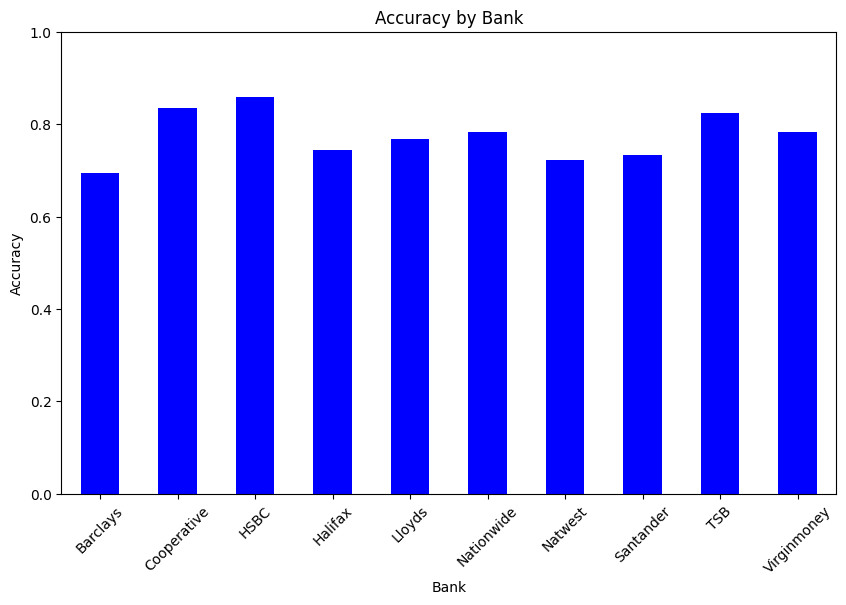

In [19]:
# Plotting the accuracy by bank
plt.figure(figsize=(10, 6))
accuracy_by_bank.plot(kind='bar', color='blue')
plt.title('Accuracy by Bank')
plt.xlabel('Bank')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(False)
plt.show()